# Q1. A company conducted a survey of its employees and found that 70% of the employees use the company's health insurance plan, while 40% of the employees who use the plan are smokers. What is the probability that an employee is a smoker given that he/she uses the health insurance plan?

To solve this problem, we can use Bayes' theorem, which states that:

#### P(A|B) = P(B|A) * P(A) / P(B)

where A and B are events, P(A) and P(B) are their respective probabilities, and P(B|A) is the conditional probability of event B given that event A has occurred.

In this case, let's define event A as "an employee uses the company's health insurance plan" and event B as "an employee is a smoker." We want to find the probability of event B given that event A has occurred, which is denoted as P(B|A).

From the problem statement, we know that P(A) = 0.70, P(B|A) = 0.40, and we want to find P(B|A). We can calculate P(B) using the law of total probability:

#### P(B) = P(B|A) * P(A) + P(B|A') * P(A')

where A' is the complement of event A (i.e., an employee does not use the health insurance plan). Since we don't have information on P(B|A'), we need to make an assumption. Let's assume that the proportion of smokers is the same among employees who do not use the health insurance plan as it is among the general population, which we'll assume to be 20% (this is just an example assumption, and the actual value could be different). Then we have:

* P(B) = P(B|A) * P(A) + P(B|A') * P(A')
* = 0.40 * 0.70 + 0.20 * 0.30
* = 0.34

Now we can apply Bayes' theorem:

* P(B|A) = P(B|A) * P(A) / P(B)
* = 0.40 * 0.70 / 0.34
* = 0.82 

Therefore, the probability that an employee is a smoker given that he/she uses the health insurance plan is 0.82, or 82%.

# Q2. What is the difference between Bernoulli Naive Bayes and Multinomial Naive Bayes?

### Here are the main differences between them:

1. Data Representation: Bernoulli Naive Bayes is used for binary data, while Multinomial Naive Bayes is used for frequency count data.

2. Feature Probability Distribution: Bernoulli Naive Bayes models each feature as a binary variable, while Multinomial Naive Bayes models each feature as a count variable.

3. Handling Absent Features: Bernoulli Naive Bayes treats the absence of a feature as informative, while Multinomial Naive Bayes does not.

4. Performance on Small Datasets: Bernoulli Naive Bayes may perform better on small datasets with sparse data, while Multinomial Naive Bayes may perform better on larger datasets with more dense data.

# Q3. How does Bernoulli Naive Bayes handle missing values?

In Bernoulli Naive Bayes, missing data is typically handled by assigning a special value to indicate the absence of a feature. This value is often denoted as "0" and is used to represent the absence of a feature in a document.

During training, the algorithm learns the probabilities of each feature appearing in each class based on the available data. When a feature is missing from a document during classification, it is assumed to have the same probability of appearing in that class as it does in the training data.

Let's say we are classifying movie reviews as positive or negative based on the presence of certain words, and we have trained a Bernoulli Naive Bayes model on a dataset of labeled reviews. During training, we see that the word "superb" appears in 80% of positive reviews and in 5% of negative reviews. Based on this, the model learns to associate the presence of "superb" with the positive class.

Now, suppose we are given a new review that does not contain the word "superb". In this case, the model assumes that the probability of "superb" appearing in this review is 0, and calculates the probability of the review belonging to each class based on the other features that are present.

# Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification. In this case, the model estimates the parameters of a Gaussian distribution for each feature in the training set, and uses Bayes' rule to calculate the posterior probability of each class for a given instance.

To handle multi-class classification, the Gaussian Naive Bayes algorithm can use a "one-vs-all" (OvA) or "one-vs-one" (OvO) approach. In the OvA approach, the model trains separate binary classifiers for each class, where each classifier predicts whether an instance belongs to that class or not. The final prediction is then based on the classifier that assigns the highest probability to the instance.

In the OvO approach, the model trains binary classifiers for every pair of classes, where each classifier predicts whether an instance belongs to one class or the other. The final prediction is then based on a majority vote across all pairwise classifiers.

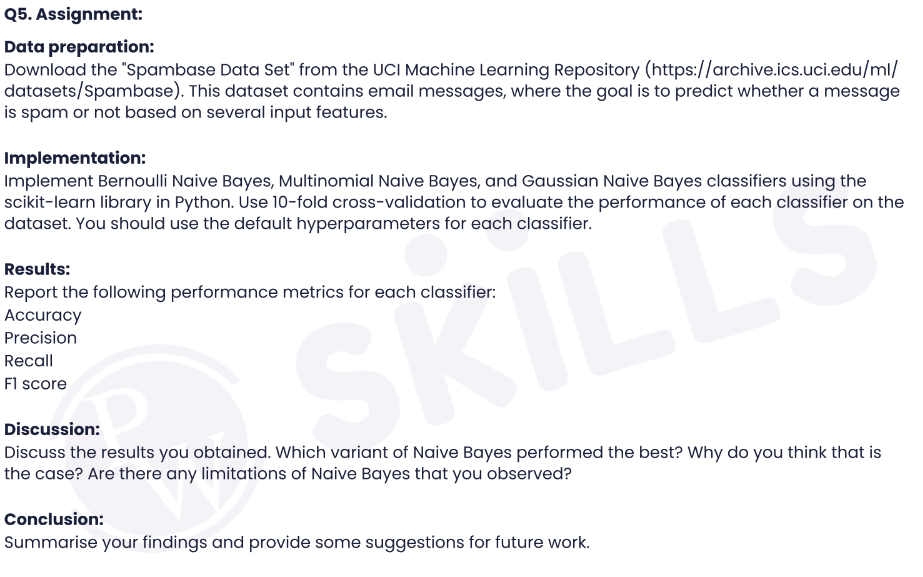

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('spambase.DOCUMENTATION','r') as f:
    a = f.read()

In [3]:
print(a)

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [95]:
with open('spambase.DOCUMENTATION','r') as f:
    b = f.read()

In [96]:
print(b)

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [4]:
df = pd.read_csv('spambase.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
## Changing Column names
features = []
for i in range(df.shape[1]):
    if i != 57 :
        fs = 'f'+str(i+1)
        features.append(fs)
    else:
        features.append('target')

In [7]:
df.shape

(4601, 58)

In [8]:
df.columns = features

In [9]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
## Checking Missing values
df.isnull().any()

f1        False
f2        False
f3        False
f4        False
f5        False
f6        False
f7        False
f8        False
f9        False
f10       False
f11       False
f12       False
f13       False
f14       False
f15       False
f16       False
f17       False
f18       False
f19       False
f20       False
f21       False
f22       False
f23       False
f24       False
f25       False
f26       False
f27       False
f28       False
f29       False
f30       False
f31       False
f32       False
f33       False
f34       False
f35       False
f36       False
f37       False
f38       False
f39       False
f40       False
f41       False
f42       False
f43       False
f44       False
f45       False
f46       False
f47       False
f48       False
f49       False
f50       False
f51       False
f52       False
f53       False
f54       False
f55       False
f56       False
f57       False
target    False
dtype: bool

In [11]:
df.target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: target, Length: 4601, dtype: int64

In [12]:
df['target'].unique()

array([1, 0])

In [13]:
df['target'].value_counts()

0    2788
1    1813
Name: target, dtype: int64

In [14]:
## Independent and dependent feartures
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [16]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: target, Length: 4601, dtype: int64

In [17]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [18]:
X_train.shape,y_train.shape

((3082, 57), (3082,))

In [19]:
X_test.shape,y_test.shape

((1519, 57), (1519,))

### 1. Gaussian NAive BAyes

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([1, 1, 0, ..., 0, 0, 1])

In [21]:
from sklearn.model_selection import StratifiedKFold
Gauss = StratifiedKFold(n_splits=10)

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GaussianNB(),X_train,y_train,cv=Gauss,scoring='accuracy')
score

array([0.83171521, 0.82524272, 0.81818182, 0.82467532, 0.82142857,
       0.79220779, 0.79220779, 0.82467532, 0.78246753, 0.84415584])

In [24]:
import numpy as np
mean_score_gnb = np.mean(score)
print(f'Accuracy of GaussianNB is {mean_score_gnb}')

Accuracy of GaussianNB is 0.8156957928802588


In [49]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
print('f1-score is',f1_score(y_test,y_pred_gnb))
print('precision is',precision_score(y_test,y_pred_gnb))
print('recall is',recall_score(y_test,y_pred_gnb))
print('accuracy is',accuracy_score(y_test,y_pred_gnb))

f1-score is 0.8135359116022101
precision is 0.7053892215568862
recall is 0.9608482871125612
accuracy is 0.8222514812376563


### 2. Bernoulli Naive Bayes

In [41]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([1, 1, 0, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(BernoulliNB(),X_train,y_train,cv=Gauss,scoring='accuracy')
score

array([0.90938511, 0.8802589 , 0.87987013, 0.89935065, 0.91233766,
       0.87987013, 0.87987013, 0.89285714, 0.8474026 , 0.88311688])

In [43]:
import numpy as np
mean_score_bnb = np.mean(score)
print(f'Accuracy of BernoulliNB is {mean_score_bnb}')

Accuracy of BernoulliNB is 0.8864319337620309


In [50]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
print('f1-score is',f1_score(y_test,y_pred_bnb))
print('precision is',precision_score(y_test,y_pred_bnb))
print('recall is',recall_score(y_test,y_pred_bnb))
print('accuracy is',accuracy_score(y_test,y_pred_bnb))

f1-score is 0.8501270110076206
precision is 0.8838028169014085
recall is 0.8189233278955954
accuracy is 0.8834759710335747


### 3. Multinomial NAvie BAyes

In [46]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
y_pred_mnb

array([1, 1, 0, ..., 0, 0, 0])

In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(MultinomialNB(),X_train,y_train,cv=Gauss,scoring='accuracy')
score

array([0.79935275, 0.8381877 , 0.75649351, 0.7987013 , 0.76623377,
       0.80194805, 0.80519481, 0.84090909, 0.79220779, 0.83766234])

In [30]:
import numpy as np
mean_score_mnb = np.mean(score)
print(f'Accuracy of MultinomialNB is {mean_score_mnb}')

Accuracy of MultinomialNB is 0.8036891102425082


In [51]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
print('f1-score is',f1_score(y_test,y_pred_mnb))
print('precision is',precision_score(y_test,y_pred_mnb))
print('recall is',recall_score(y_test,y_pred_mnb))
print('accuracy is',accuracy_score(y_test,y_pred_mnb))

f1-score is 0.7707160096540627
precision is 0.7603174603174603
recall is 0.7814029363784666
accuracy is 0.8123765635286373


## Best Model for above data is Bernoulli Naive Bayes

### Bernoulli Naive Bayes is best model because of below reasons :

1. BernoulliNB has highest test f1 score of 0.8501
2. BernoulliNB has highest test accuracy of 0.8834
3. BernoulliNB has highest 10 fold cross validation accuracy of 0.88

Although Naive Bayes algorithm is a powerful and widely used algorithm, it also has some limitations, including:

The assumption of feature independence: The Naive Bayes algorithm assumes that the features are independent of each other. However, in real-world scenarios, this assumption is not always true, and features may be dependent on each other.

1. Sensitivity to input data: Naive Bayes algorithm is very sensitive to input data, and even a slight change in the input data can significantly affect the accuracy of the model.

2. Lack of tuning parameters: Naive Bayes algorithm does not have many tuning parameters that can be adjusted to improve its performance.

3. Data sparsity problem: Naive Bayes algorithm relies on a lot of training data to estimate the probabilities of different features. However, if some features have very low frequencies in the training data, the algorithm may not be able to accurately estimate their probabilities.

4. Class-conditional independence assumption: Naive Bayes algorithm assumes that each feature is conditionally independent given the class. However, in many cases, this assumption may not hold, and the algorithm may not perform well.

5. Imbalanced class distribution: Naive Bayes algorithm assumes that the classes are equally likely, but in real-world scenarios, the class distribution may be imbalanced, which can lead to biased results.

The need for continuous data: Naive Bayes algorithm assumes that the input features are continuous, which may not always be the case in real-world scenarios where the input features are discrete.